## Alternating Projection

In [140]:
from scipy.linalg import lu_factor, lu_solve
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import random

In [162]:
m = 100
n = 500
c = np.random.rand(n)
A = np.random.rand(m,n)
x0 = np.random.rand(n)
zeroInd = random.sample(range(n),200)
x0[zeroInd] = 0         #set some parts of x0 to 0
b = A@x0
#
# generate KKT matrix
arr_left_1 = np.concatenate([A, np.zeros((m,m)), np.zeros((m,n))], axis = 1)
arr_left_2 = np.concatenate([np.zeros((n,n)), A.transpose(), np.identity(n)], axis = 1)
arr_left_3 = np.concatenate([c, -b, np.zeros(n)])
arr_right = np.concatenate([b, c, [0]])
KKT = np.concatenate([arr_left_1, arr_left_2, np.reshape(arr_left_3,(1,-1))])
projM_1 = np.concatenate([np.identity(n+m+n), KKT.transpose()],axis = 1)
projM_2 = np.concatenate([KKT, np.zeros((m+n+1,n+m+1))], axis = 1)
projM = np.concatenate([projM_1, projM_2], axis = 0)

In [163]:
# factorizing F
lu, piv = lu_factor(projM)

# Initialize working variable
z = np.random.rand(n+m+n)
maxiter = 10000
distance = np.zeros(maxiter)


In [164]:
# main loop
for i in range(maxiter):
    tmp = lu_solve((lu, piv), np.concatenate([z, arr_right]))   # projection to KKT space
    zt = tmp[0:n+m+n]
    xnew = np.clip(zt[0:n],0,np.Inf)
    Lambda = np.clip(zt[n+m:n+m+n],0,np.Inf)
    z = np.concatenate([xnew, zt[n:n+m], Lambda])
    distance[i] = np.linalg.norm(zt - z)

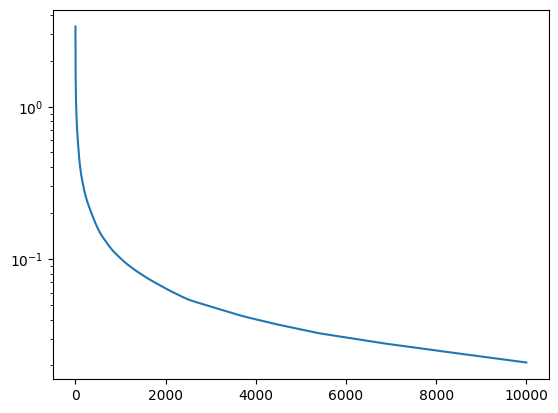

In [165]:
plt.semilogy(range(maxiter),distance)